## Data Preparation

In [79]:
## Importing Dependency 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
data_orginal = pd.read_csv("data/train.csv")
data_orginal.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [81]:
data_orginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [82]:
# Checking the columns that has null or missing values 

columns = data_orginal.columns
columns_with_missing_values = []
for col in columns:
    if data_orginal[col].isnull().sum() > 0 :
        print(col, data_orginal[col].isnull().sum())
        columns_with_missing_values.append(col)

LotFrontage 259
Alley 1369
MasVnrType 872
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


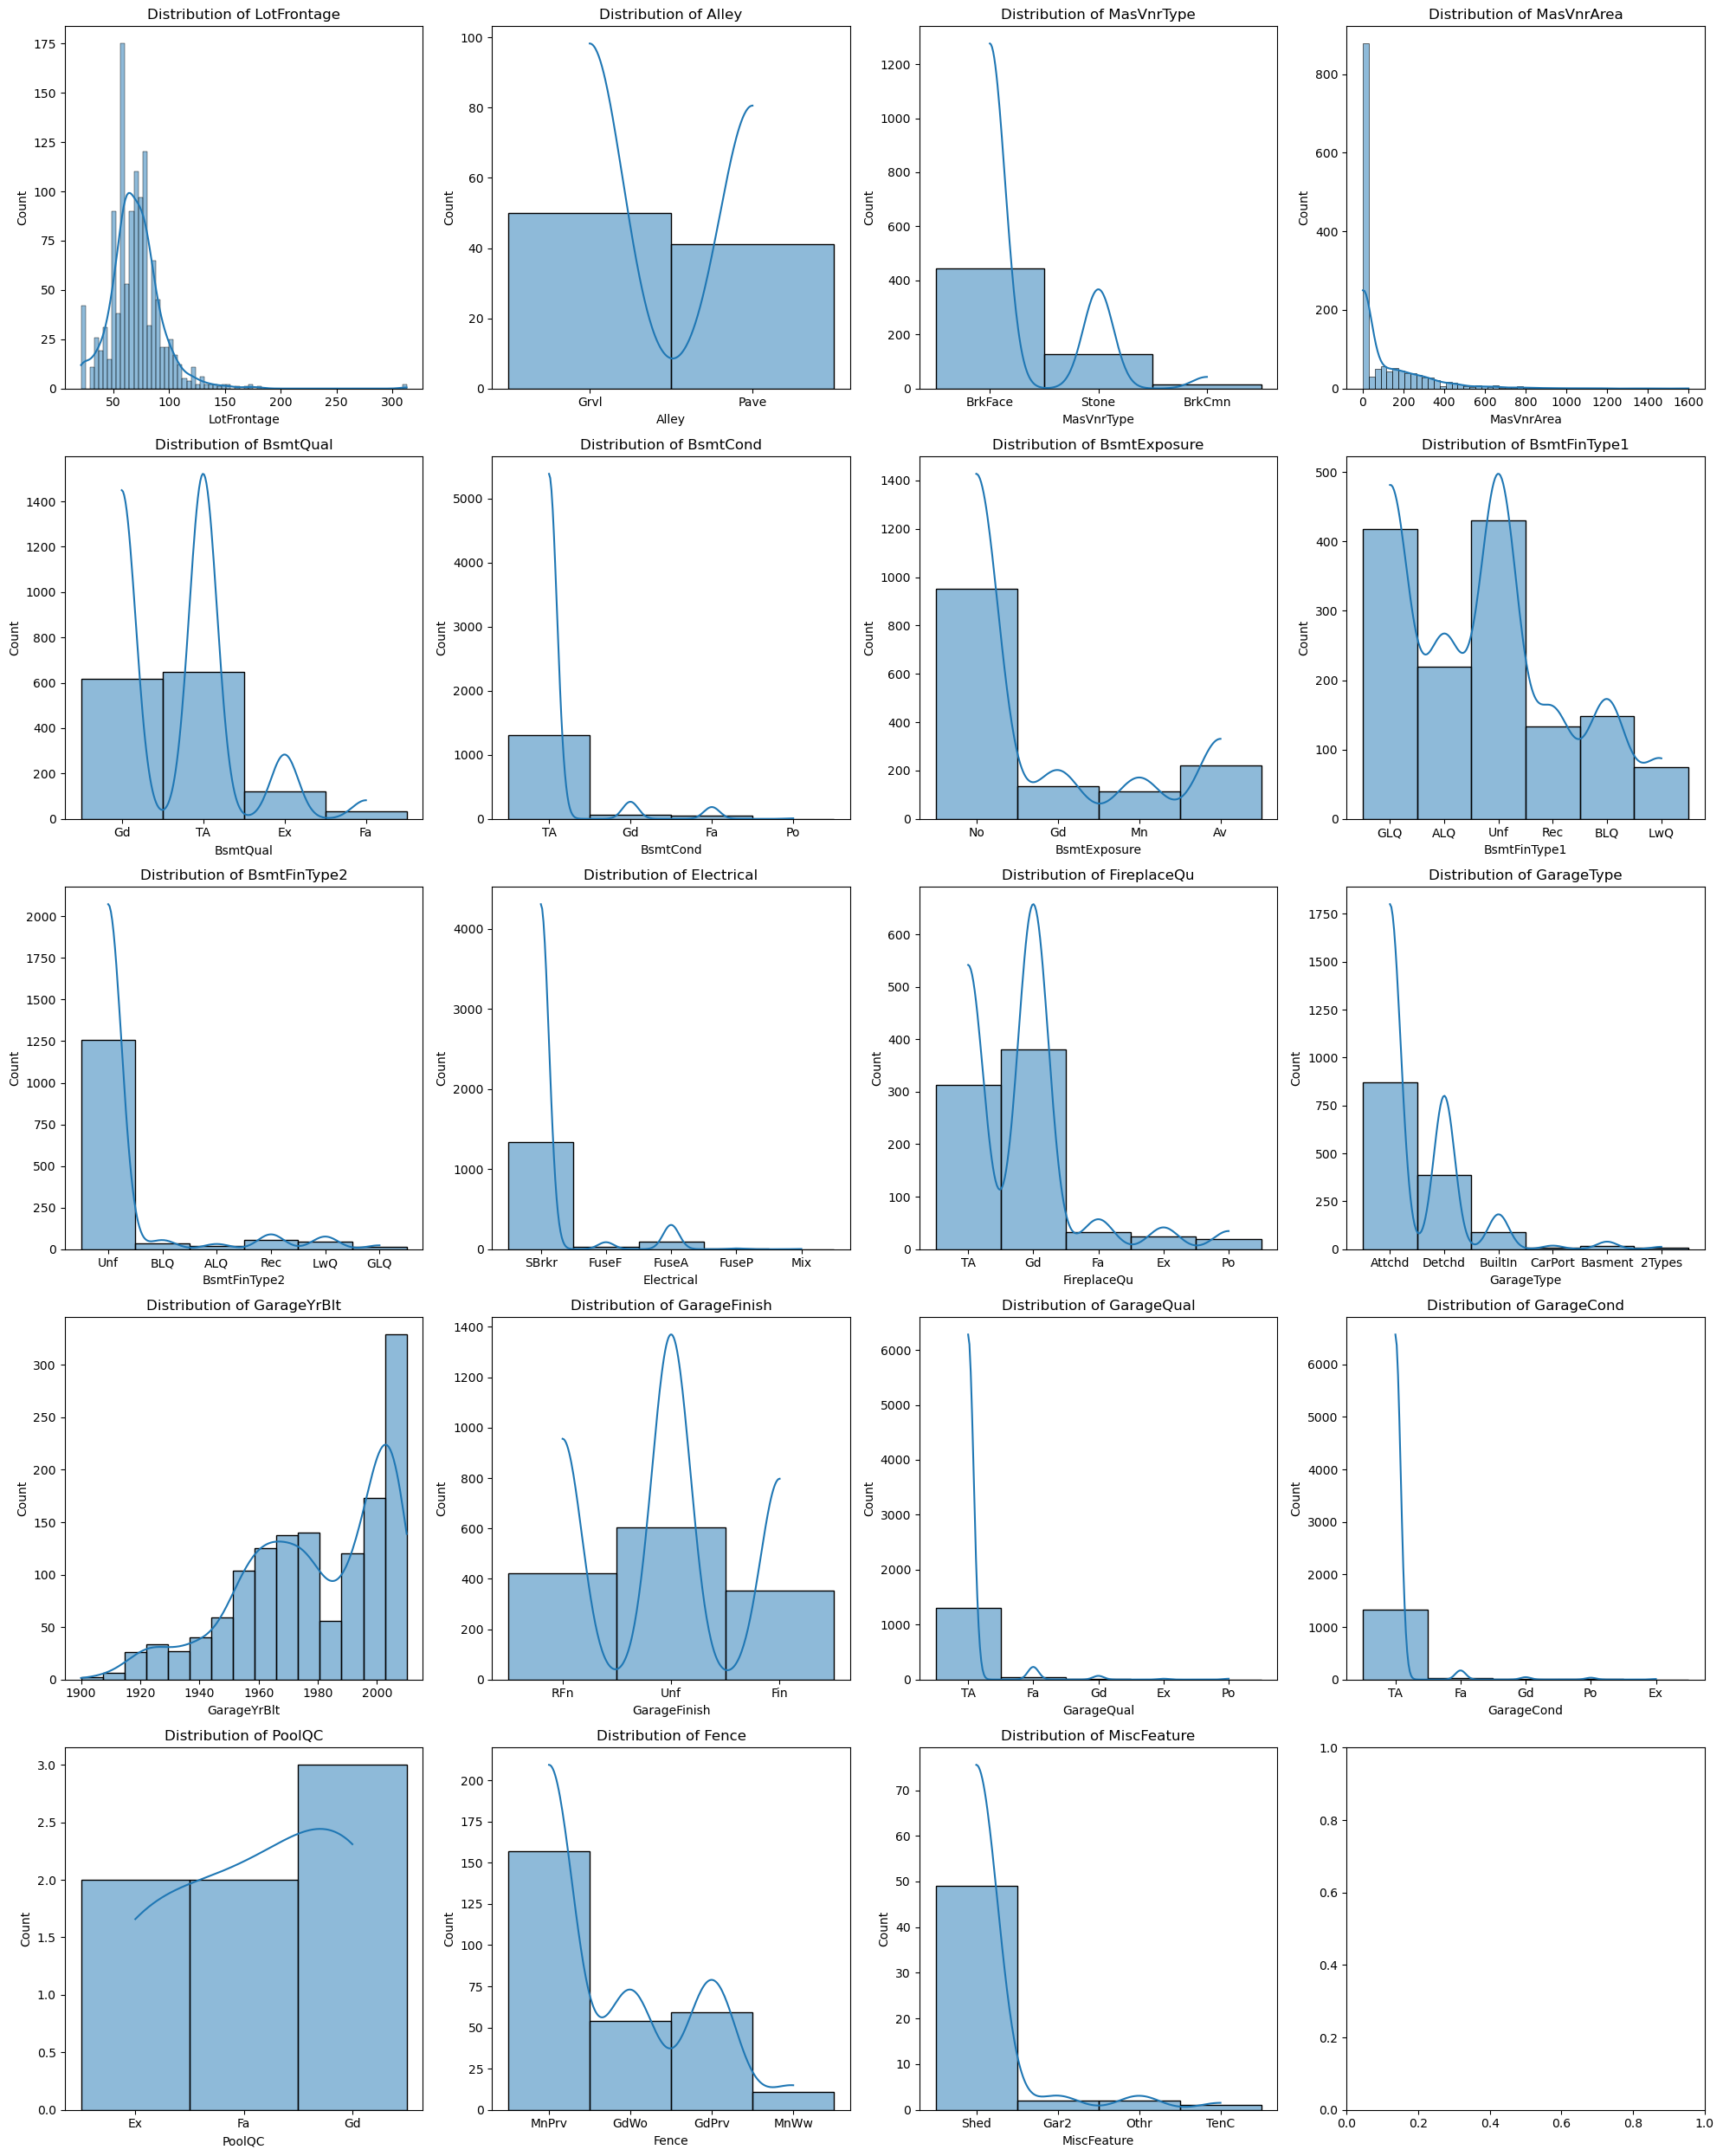

In [83]:
# Seeing the distribution of how the columns are distrubuted to check how to handle them. 
columns_with_missing_values 

fig, axes = plt.subplots(len(columns_with_missing_values) // 4 + 1, 4, figsize=(20, 5 * (len(columns_with_missing_values) // 4 + 1)))

for i, col in enumerate(columns_with_missing_values):
    sns.histplot(data_orginal[col], kde=True, ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [84]:
data_orginal.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

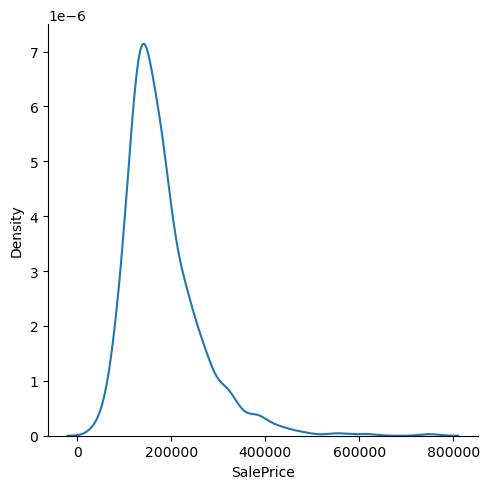

In [85]:
target_feature = data_orginal['SalePrice']

# Checking the distribution of the Plot
sns.displot(target_feature, kind='kde')

In [86]:
# Creating a copy of the dataframe 

data_copy = data_orginal.copy()

In [87]:
# Handling the Missing Values - based on their skewness

# Seperating - Numerical and Catagorical Data in columns_with_missing_values

numerical_missing_data = []
categorical_missing_data = []

for item in columns_with_missing_values:
    if data_orginal[item].dtype in ["int64", "float64"]:
        numerical_missing_data.append(item)
    else:
        categorical_missing_data.append(item)

print("The number of numerical features with missing values", len(numerical_missing_data))
print("The number of categorical features with missing values",len(categorical_missing_data))

numerical_missing_df = data_orginal[numerical_missing_data]
categorical_missing_df = data_orginal[categorical_missing_data]

# Importing SimpleImputer (Can also use FillNa)
from sklearn.impute import SimpleImputer
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')


numerical_missing_df = pd.DataFrame(numerical_imputer.fit_transform(numerical_missing_df), columns=numerical_missing_df.columns)
categorical_missing_df = pd.DataFrame(categorical_imputer.fit_transform(categorical_missing_df), columns=categorical_missing_df.columns)

# Merging the dataframes back into the copy of the dataframe
data_copy.update(numerical_missing_df)
data_copy.update(categorical_missing_df)

The number of numerical features with missing values 3
The number of categorical features with missing values 16


In [88]:
# Verifying there are no missing values now 

data_copy.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

## EDA

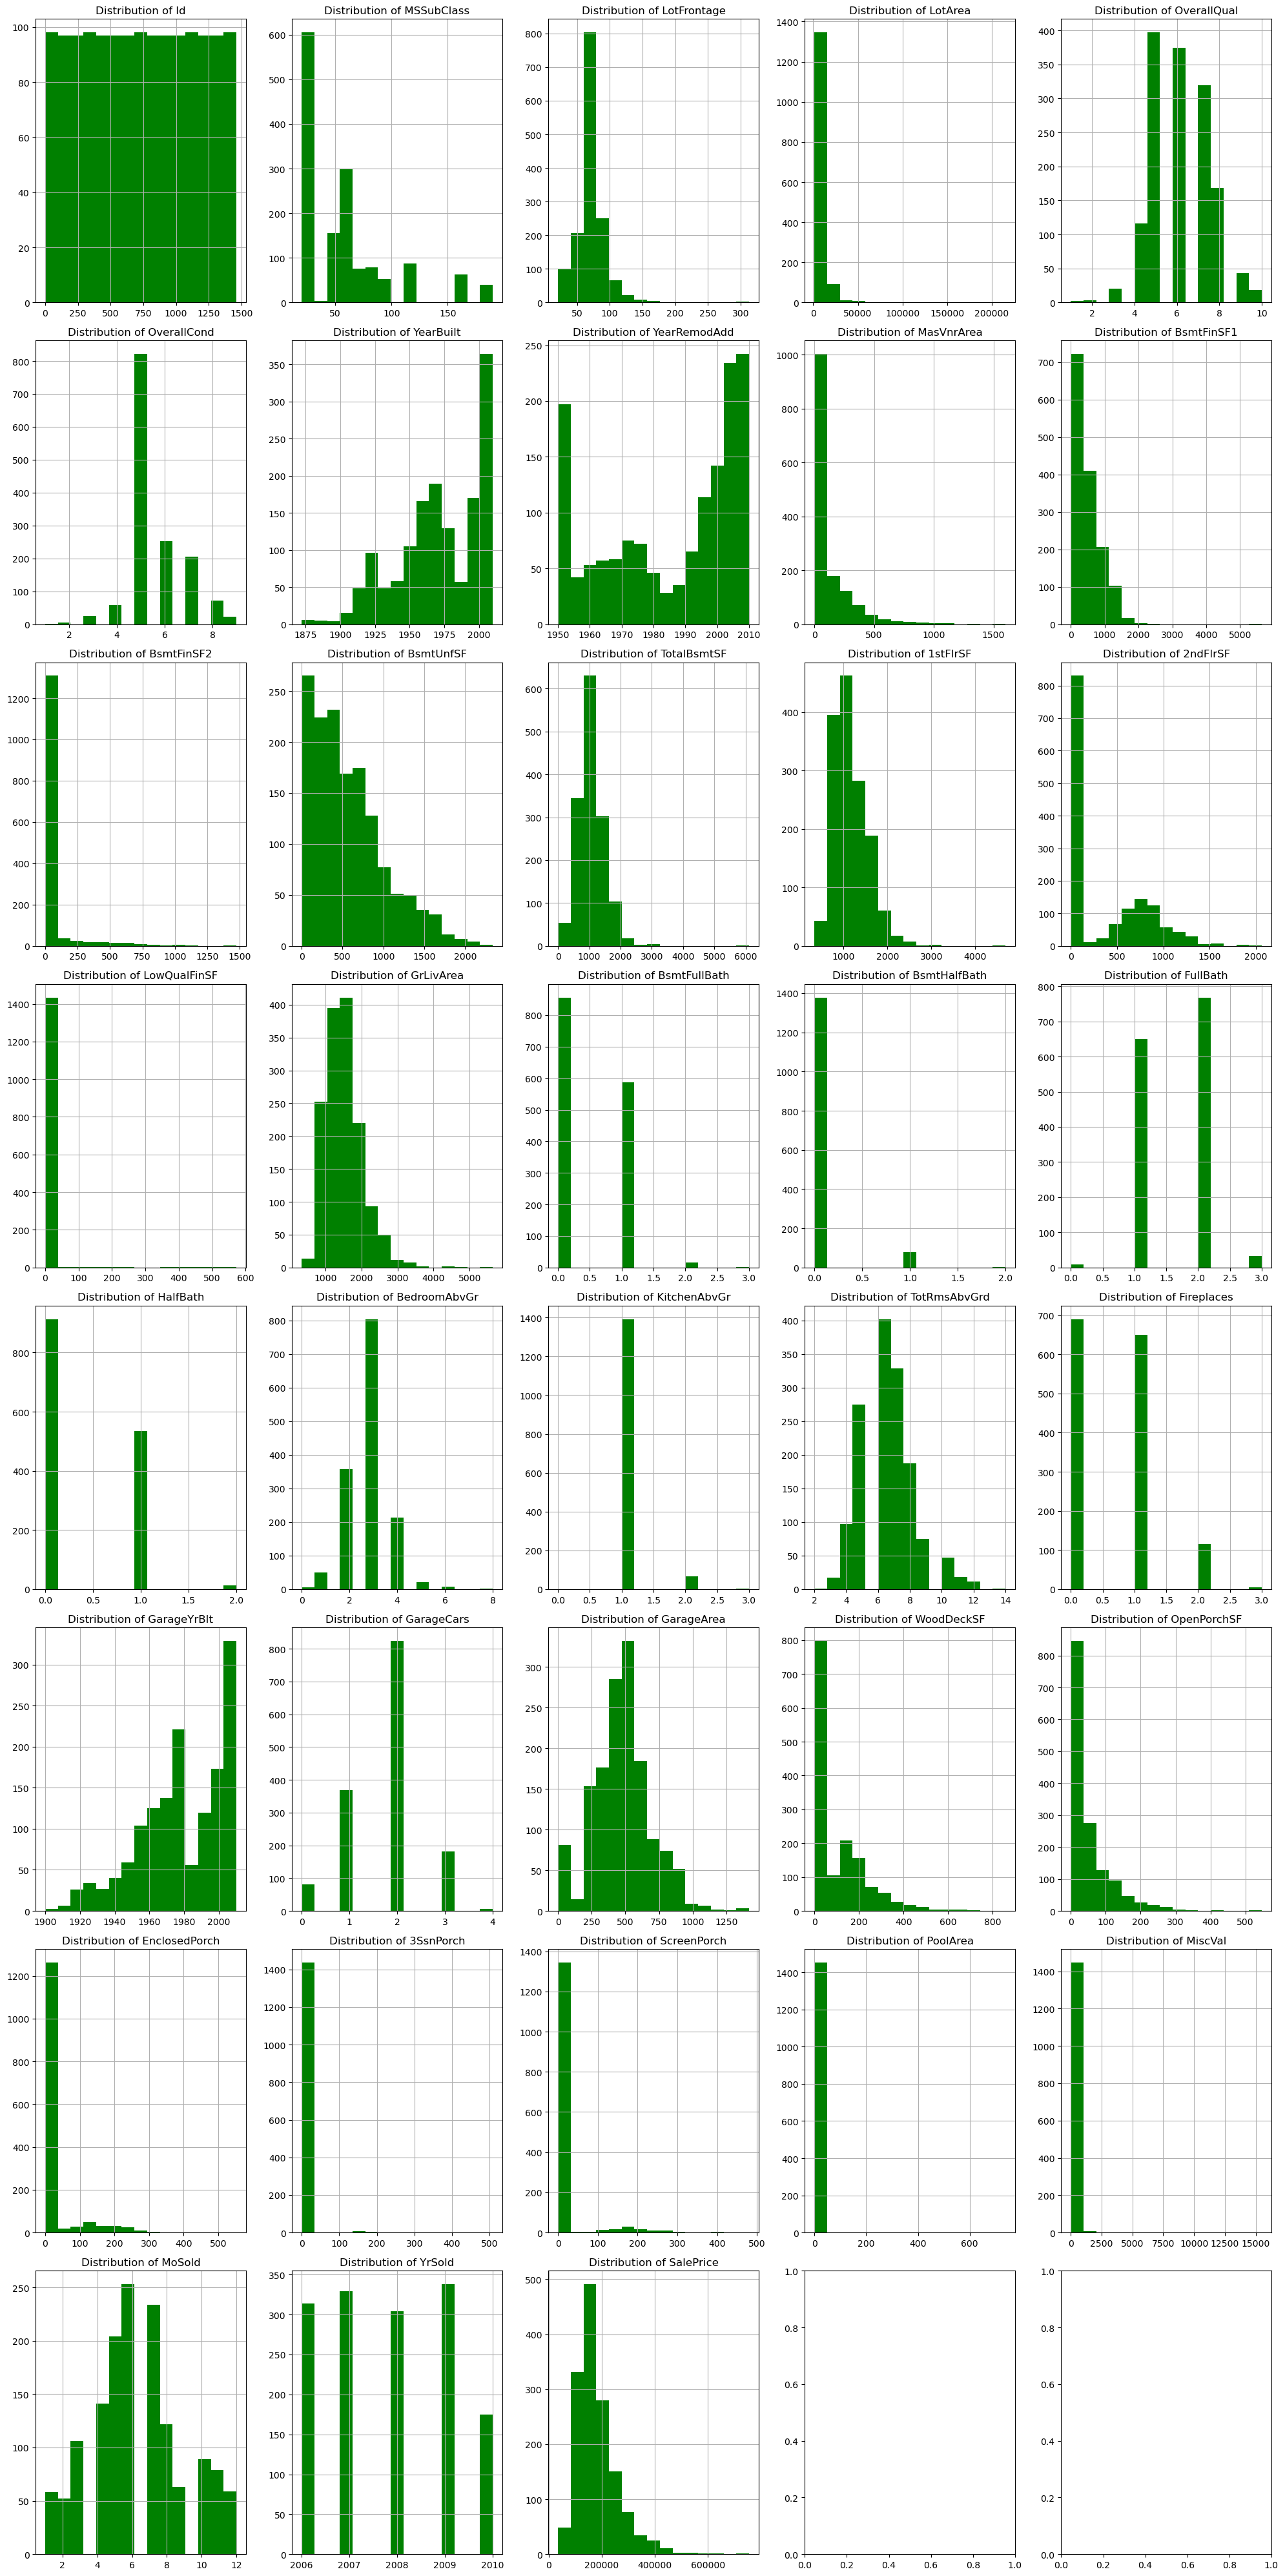

In [89]:
# Univariate Analysis

# Filter numerical columns
numerical_cols = data_copy.select_dtypes(include=["int64", "float64"]).columns

fig, axes = plt.subplots(len(numerical_cols) // 5 + 1, 5, figsize=(20, 5 * (len(numerical_cols) // 5 + 1)))

for i, col in enumerate(numerical_cols):
    data_copy[col].hist(bins=15, ax=axes[i // 5, i % 5], color='green')
    axes[i // 5, i % 5].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

##### Analysis: 
    1. 
    2. 

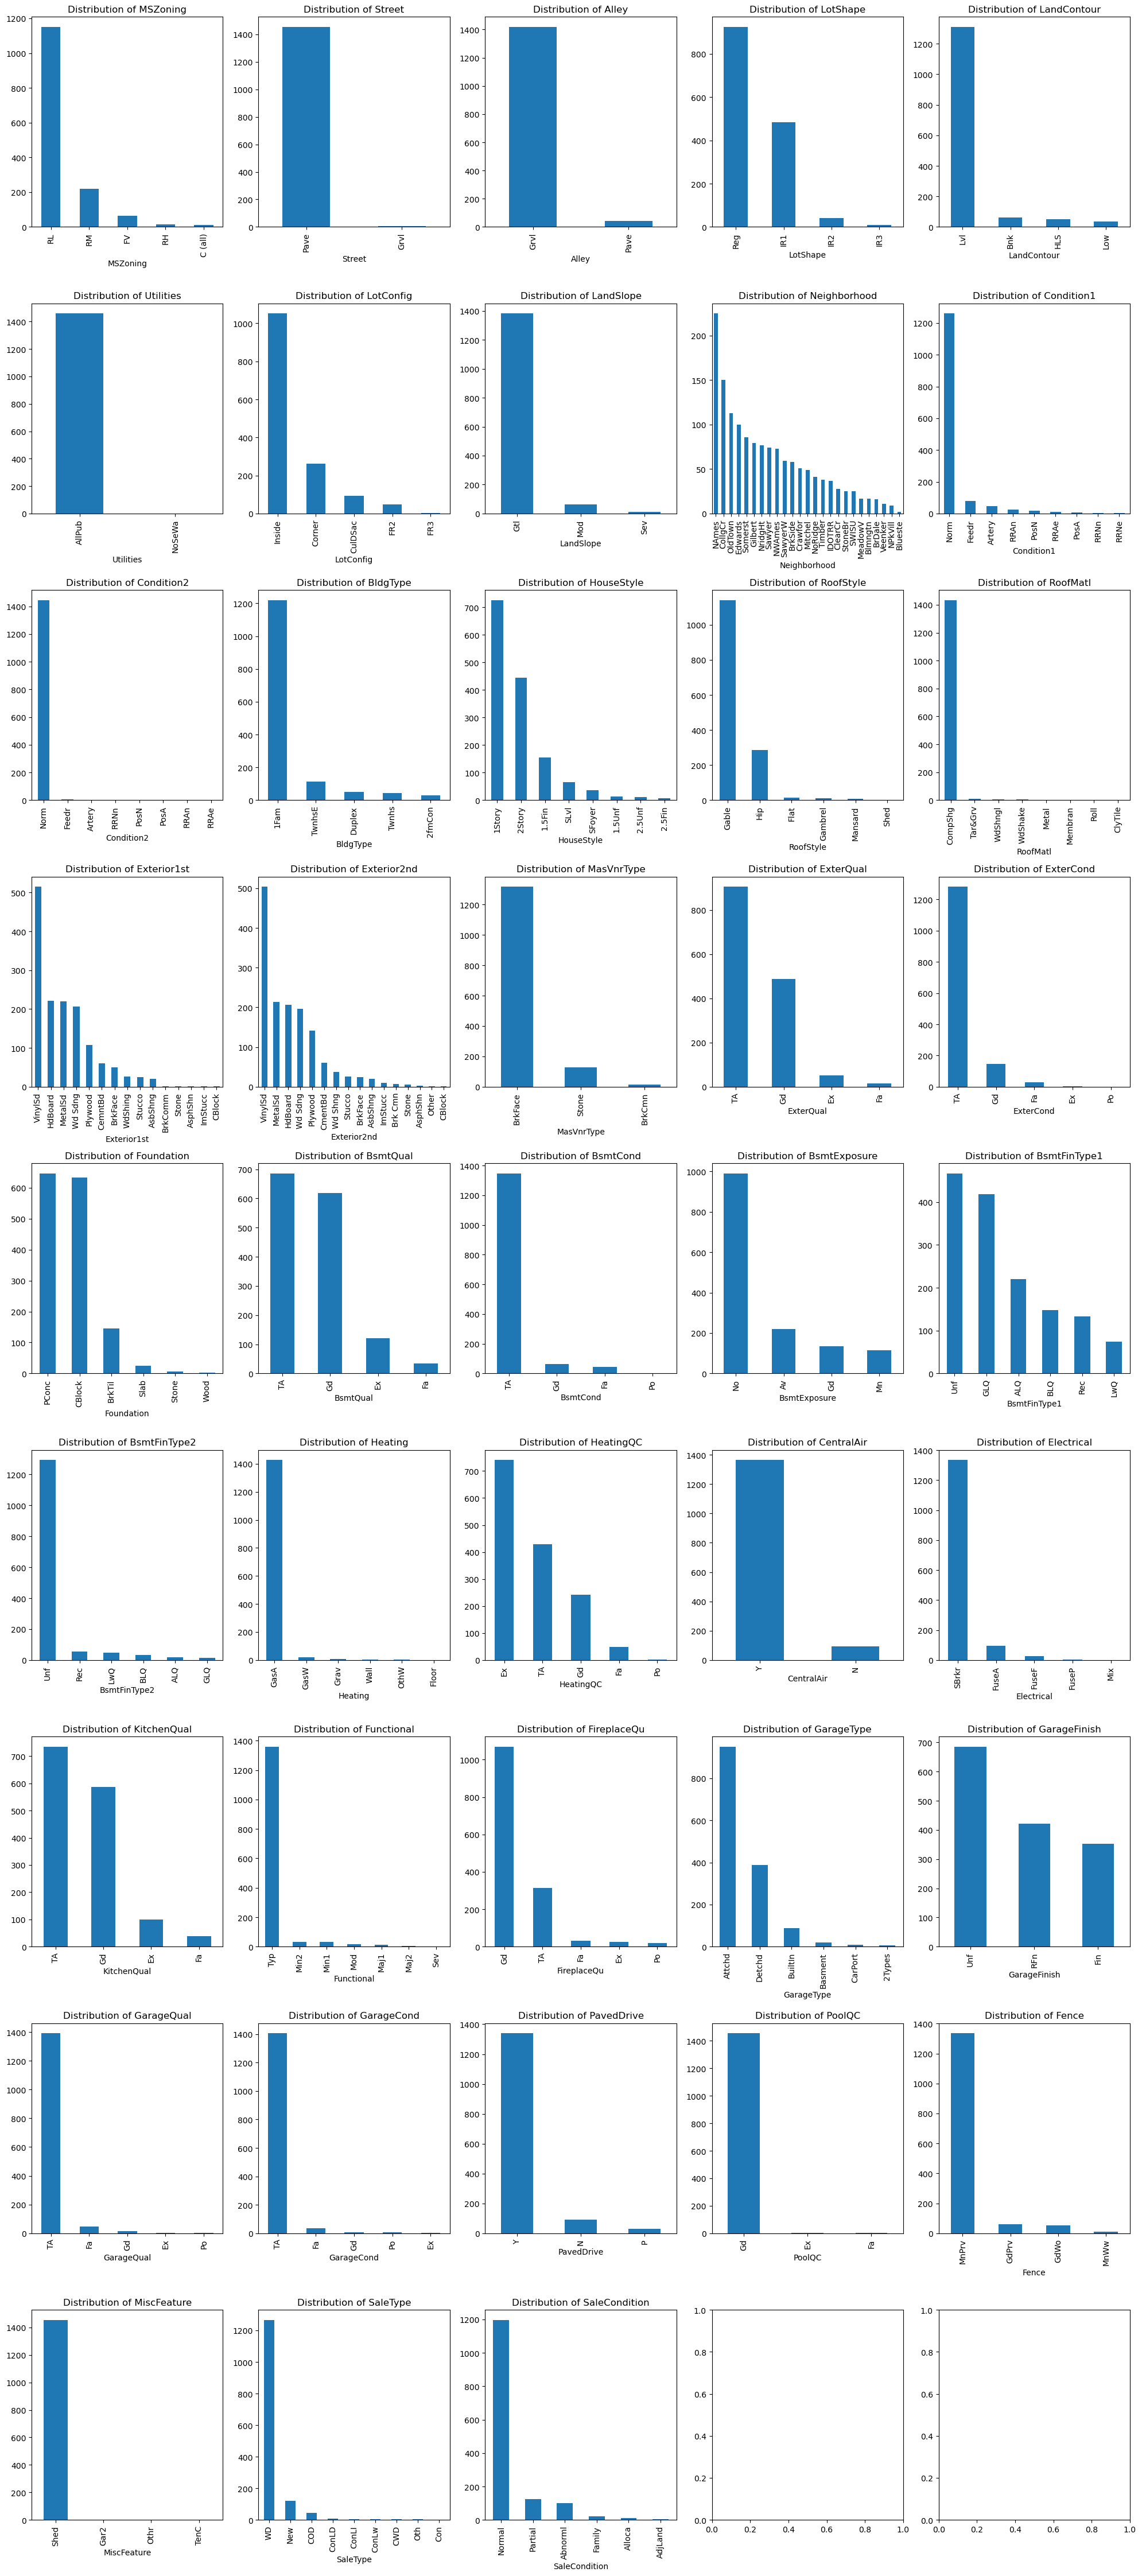

In [90]:
# Univariate Analysis

# Categorical features

# Filter categorical columns
categorical_cols = data_copy.select_dtypes(include=["object"]).columns

fig, axes = plt.subplots(len(categorical_cols) // 5 + 1, 5, figsize=(20, 5 * (len(categorical_cols) // 5 + 1)))

for i, col in enumerate(categorical_cols):
    data_copy[col].value_counts().plot(kind='bar', ax=axes[i // 5, i % 5])
    axes[i // 5, i % 5].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

##### Analysis: 
    1. 
    2. 

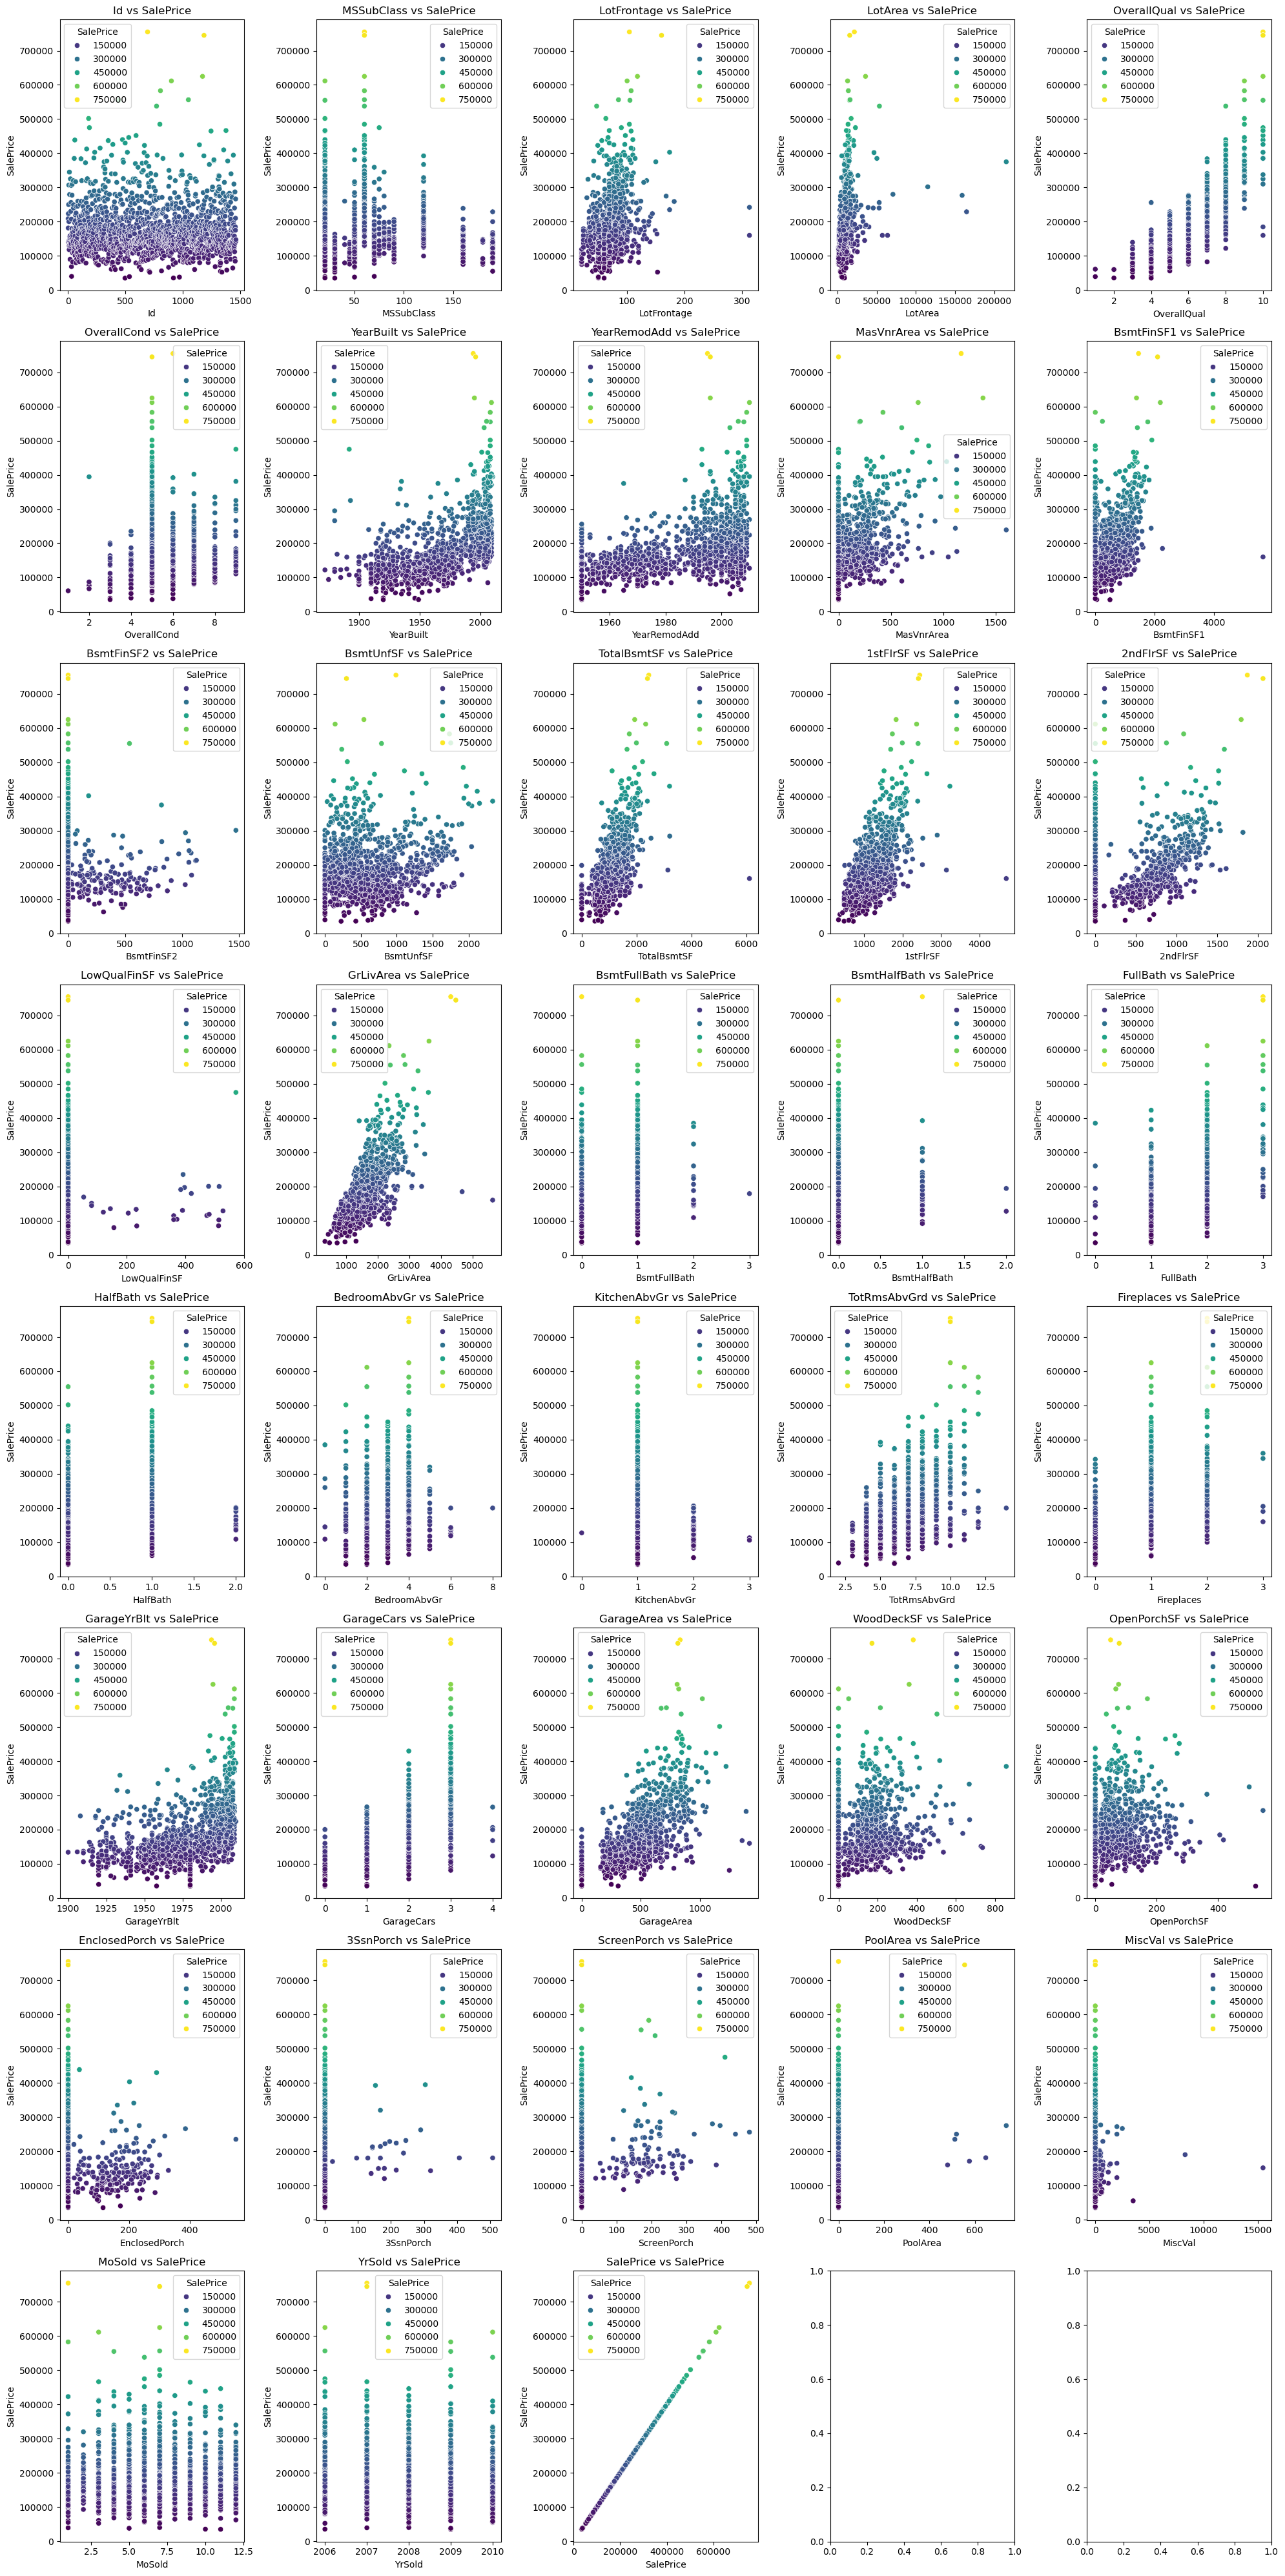

In [91]:
# Bivariate Analysis

# Analyzing relationships between numerical features and the target feature 'SalePrice'
fig, axes = plt.subplots(len(numerical_cols) // 5 + 1, 5, figsize=(20, 5 * (len(numerical_cols) // 5 + 1)))

for i, col in enumerate(numerical_cols):
    sns.scatterplot(x=data_copy[col], y=target_feature, ax=axes[i // 5, i % 5], hue=target_feature, palette='viridis')
    axes[i // 5, i % 5].set_title(f'{col} vs SalePrice')

plt.tight_layout()
plt.show()


##### Analysis: 
    1. 
    2. 

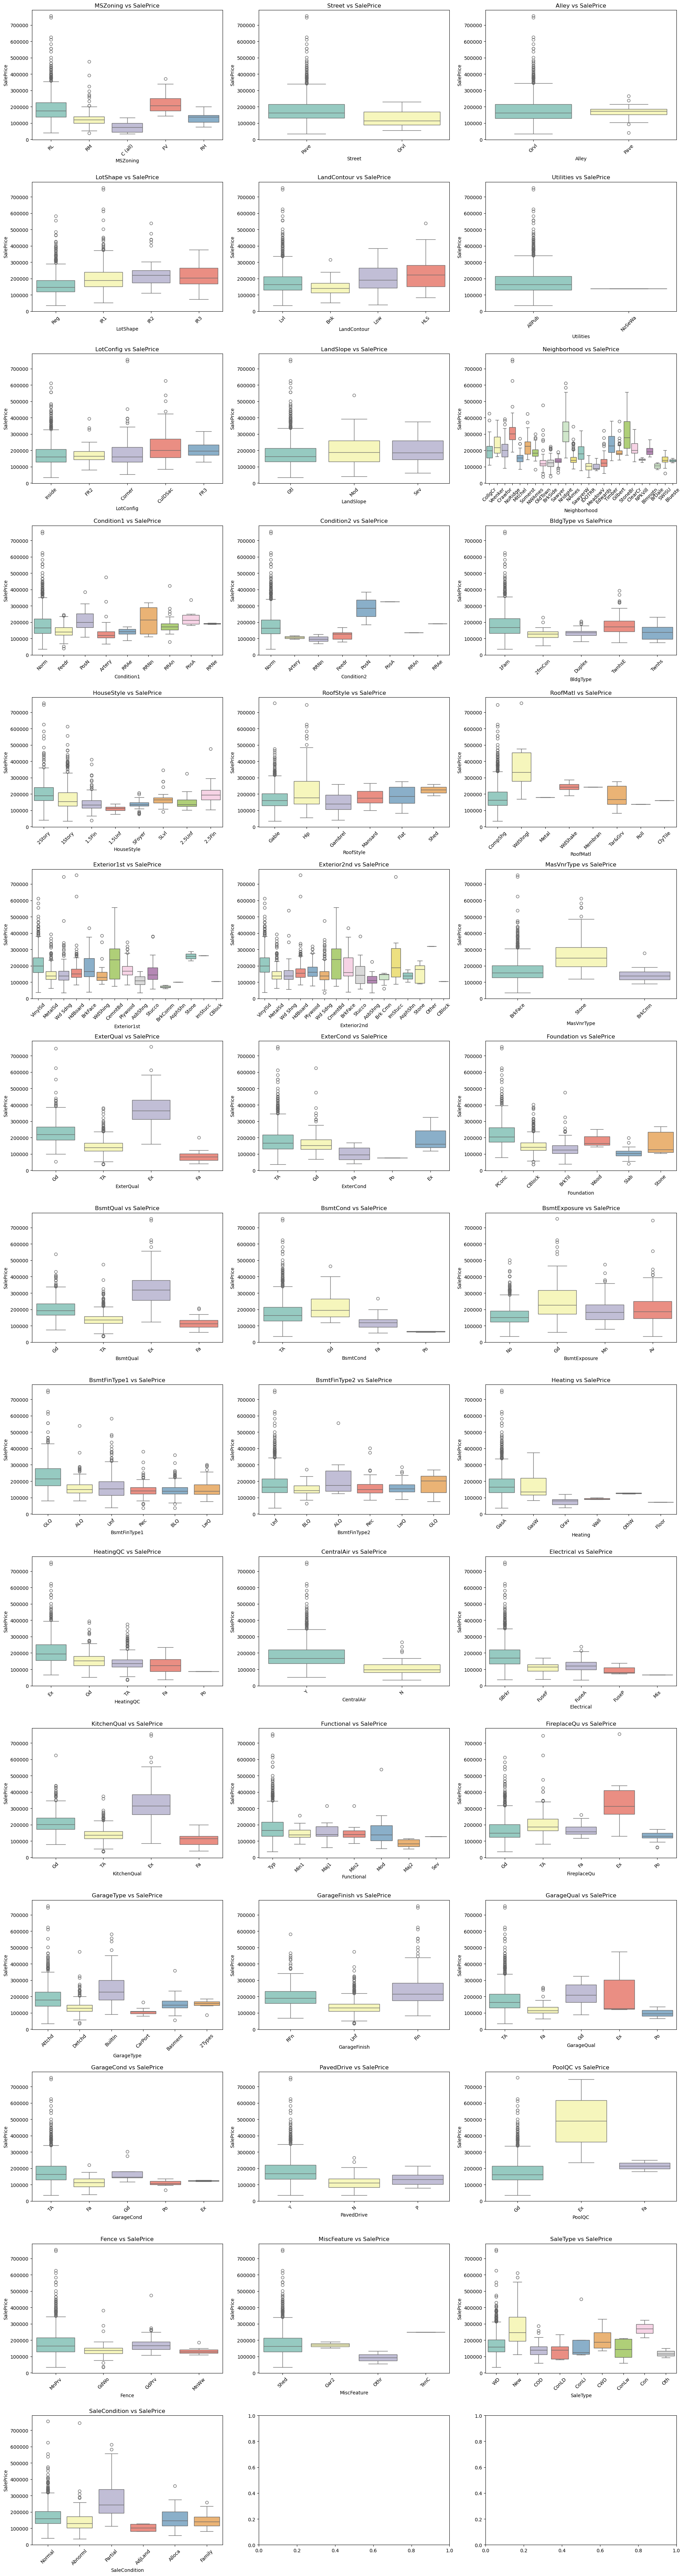

In [92]:
# Bivariate Analysis for Categorical Features

fig, axes = plt.subplots(len(categorical_cols) // 3 + 1, 3, figsize=(20, 5 * (len(categorical_cols) // 3 + 1)))

for i, col in enumerate(categorical_cols):
    sns.boxplot(x=data_copy[col], y=target_feature, hue=data_copy[col], ax=axes[i // 3, i % 3], palette='Set3', legend=False)
    axes[i // 3, i % 3].set_title(f'{col} vs SalePrice')
    axes[i // 3, i % 3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##### Analysis: 
    1. 
    2. 

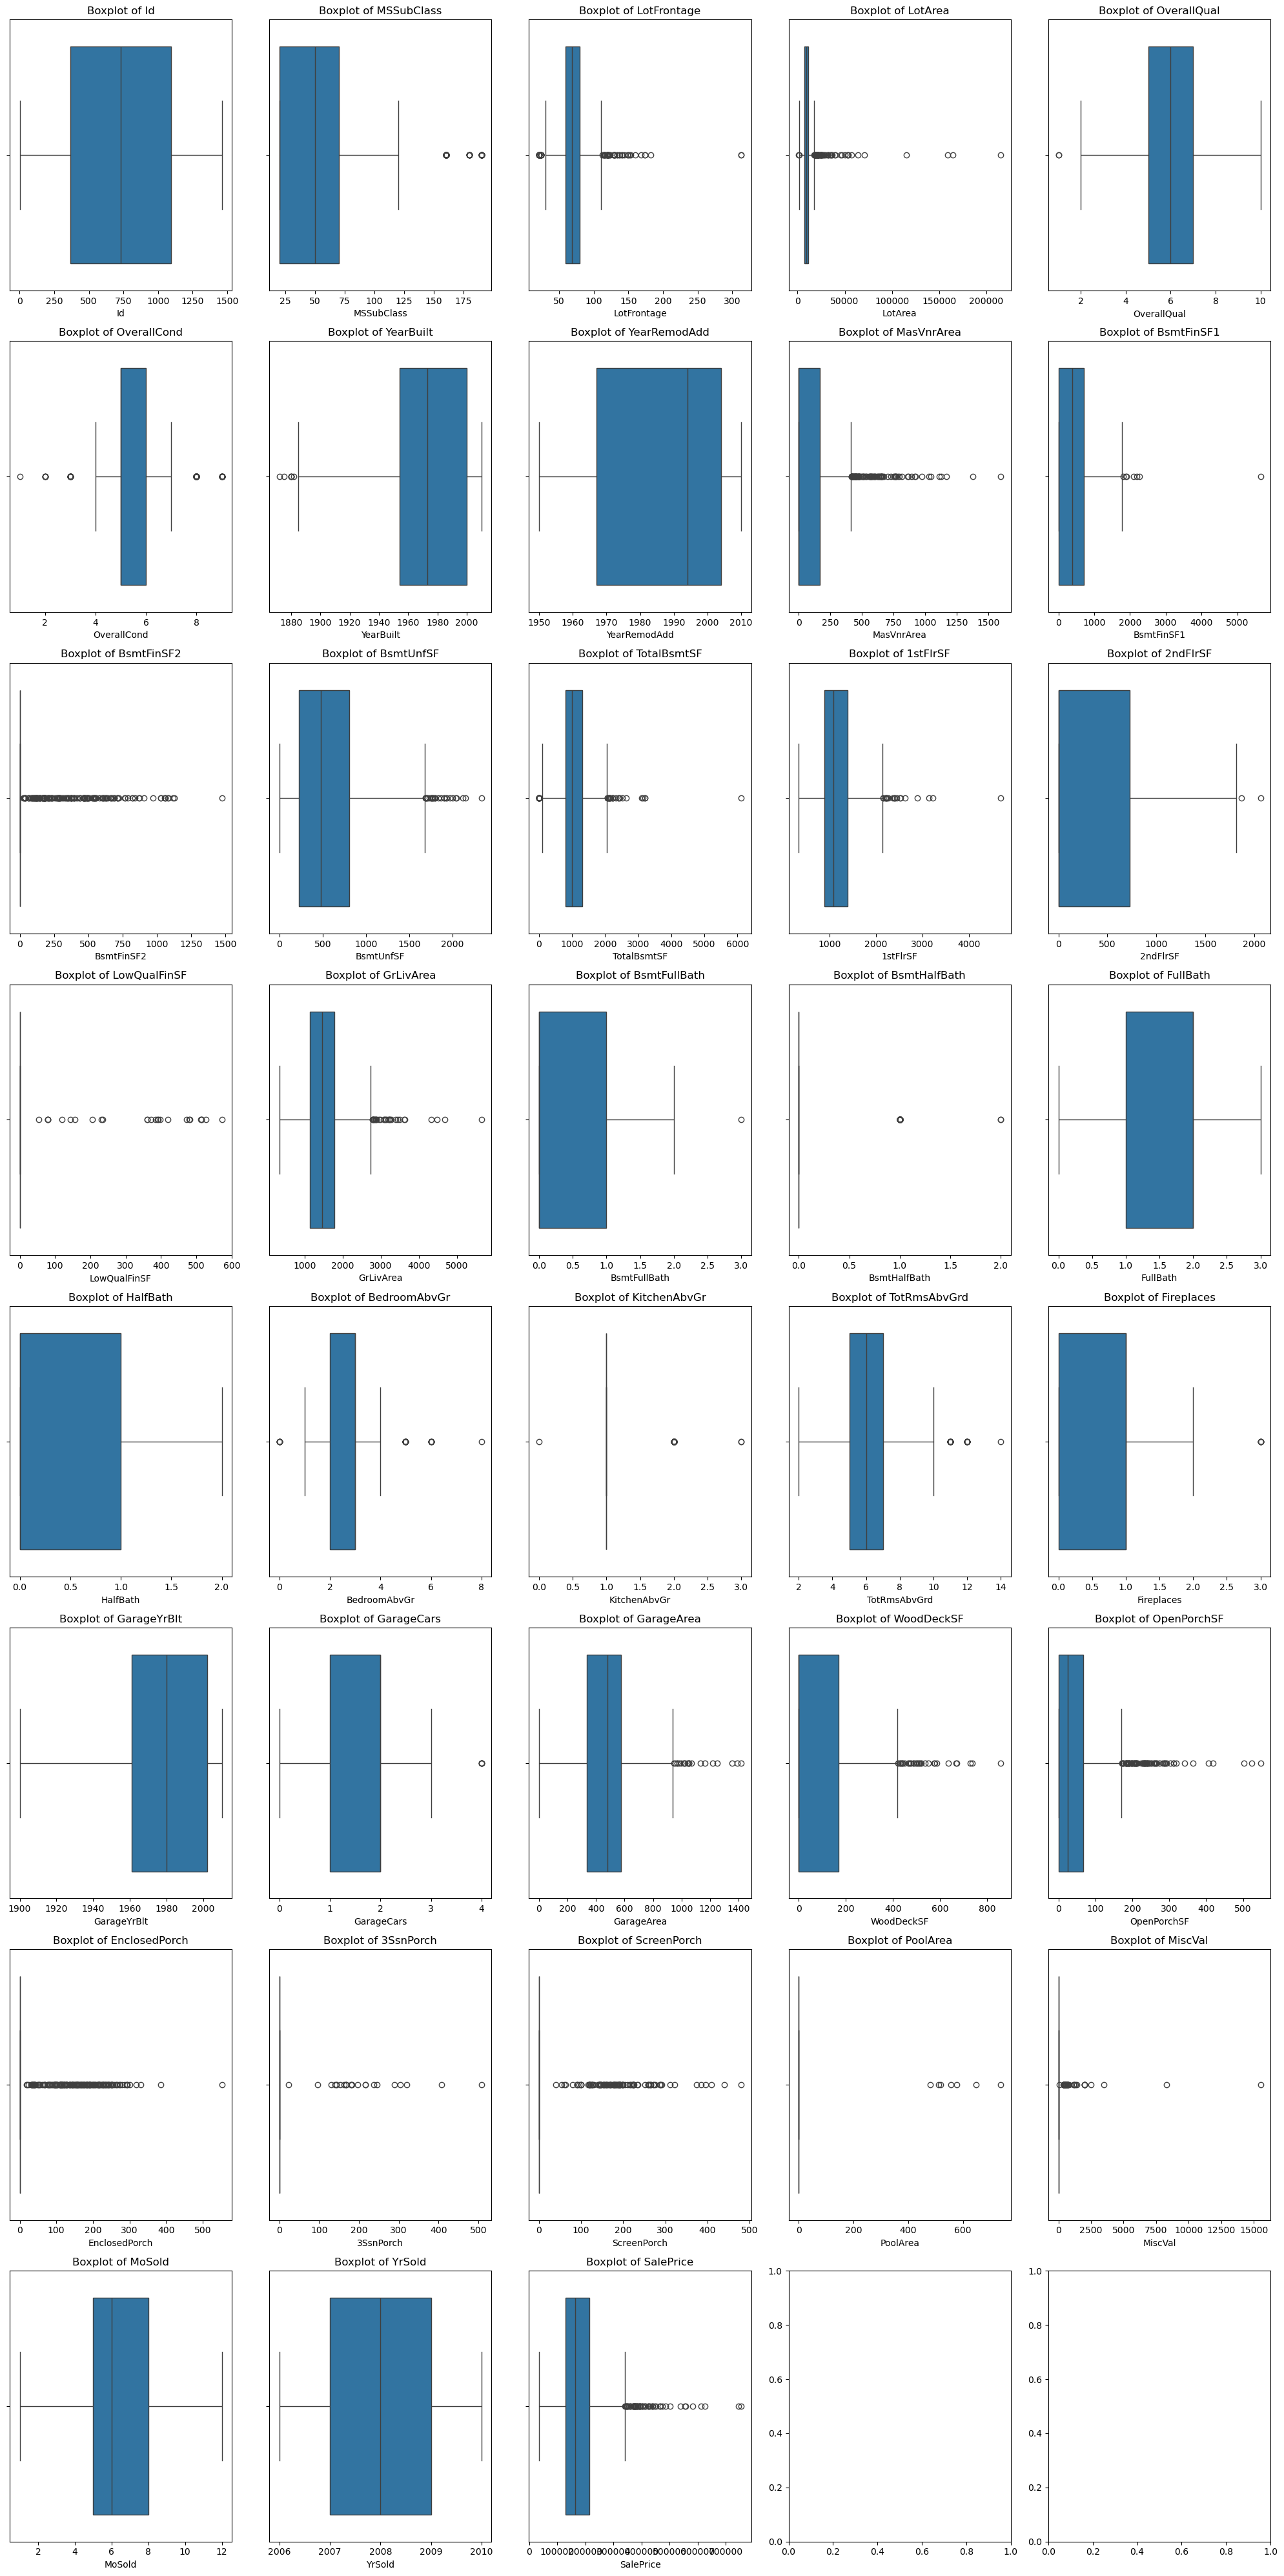

In [93]:
# Identifying Outliers

# numerical_data = []
# for col in data_copy:
#     if data_copy[col].dtype == "int64" or "float64":
#         numerical_data.append(col)

numerical_cols = data_copy.select_dtypes(include=["int64", "float64"]).columns


fig, axes = plt.subplots(len(numerical_cols) // 5 + 1, 5, figsize=(20, 5 * (len(numerical_cols) // 5 + 1)))

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=data_orginal[col], ax=axes[i // 5, i % 5])
    axes[i // 5, i % 5].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [94]:
# Handle outliers - TODO


In [95]:
# Seperating Numerical and Categorical into two DataFrames

numerical_df = pd.DataFrame(data_copy[numerical_cols])
categorical_df = pd.DataFrame(data_copy[categorical_cols])

In [96]:
numerical_df.shape

(1460, 38)

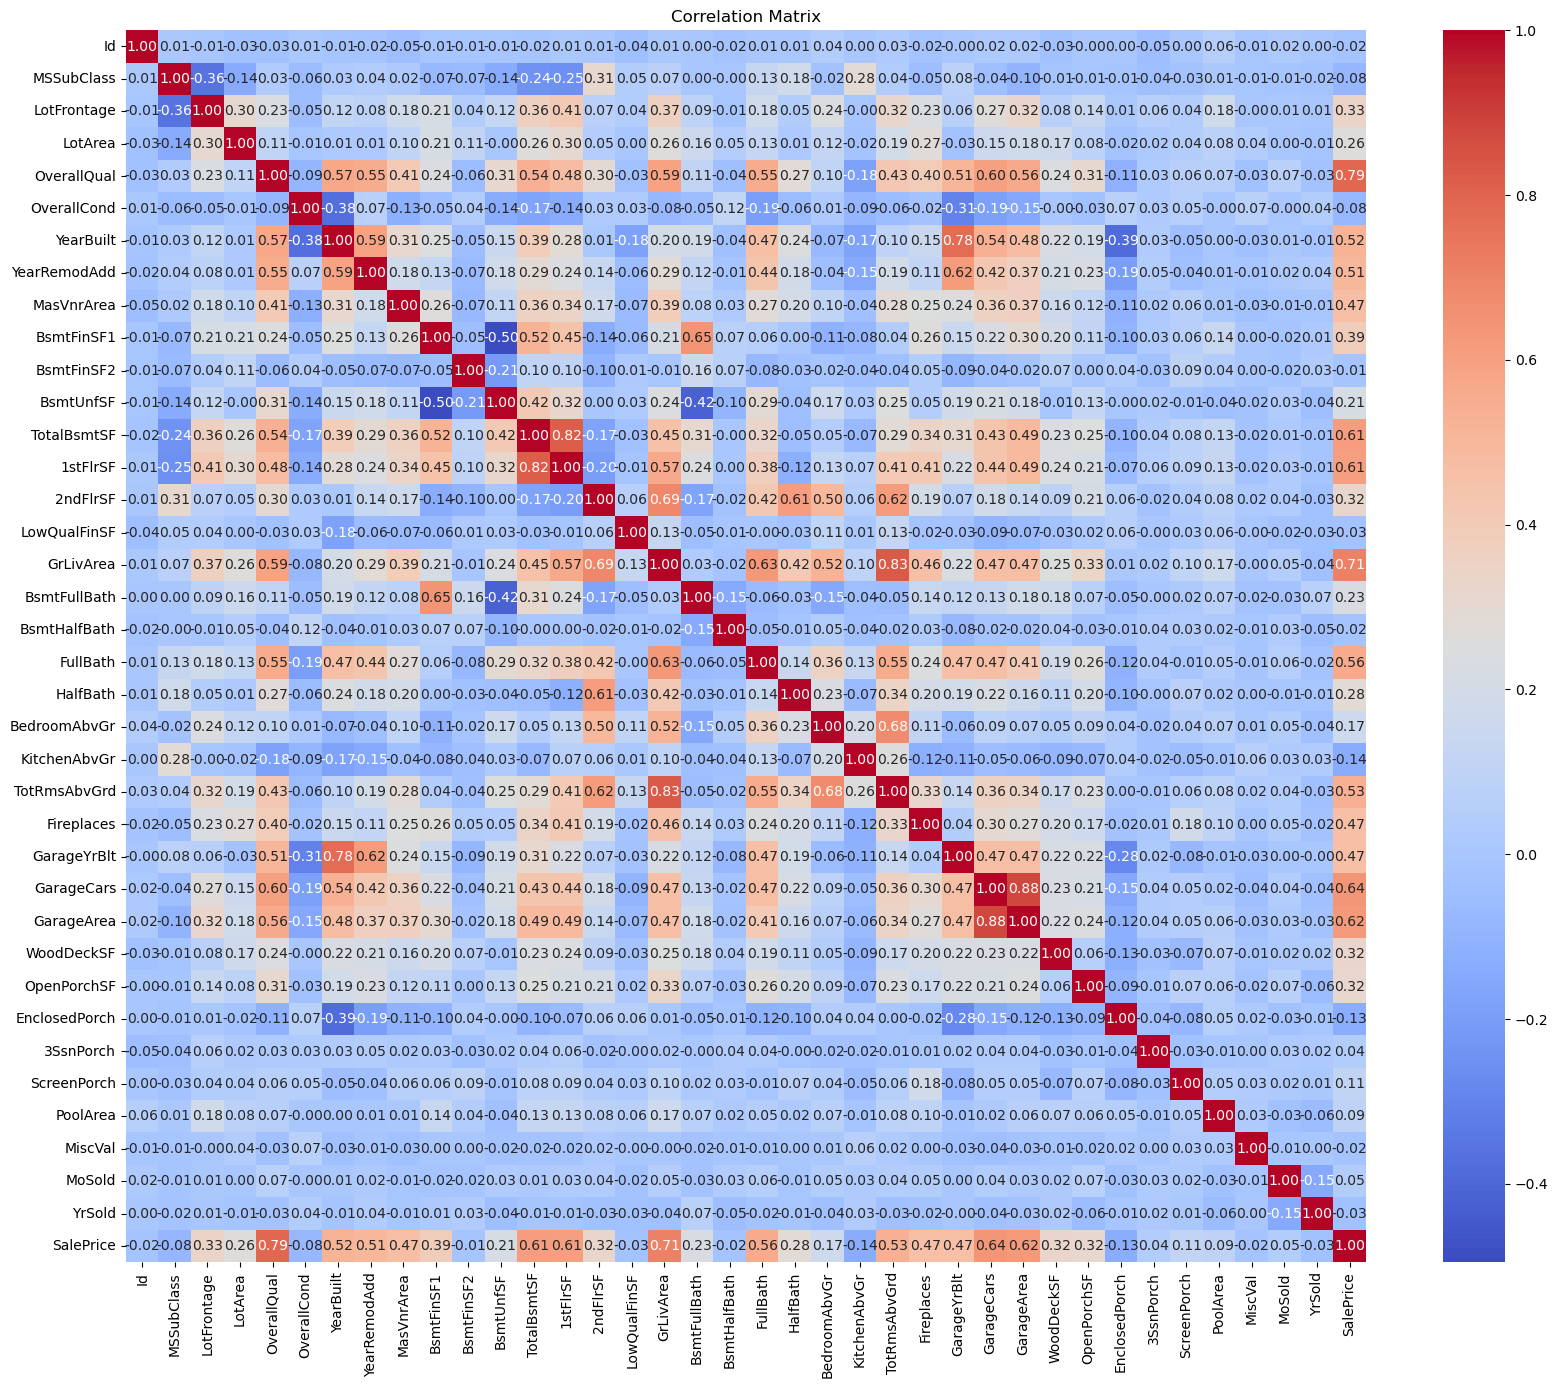

In [97]:
# Correlation Analysis for Numerical features

corr_matrix = numerical_df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [98]:
# Filtering both row and column using loc
filtered_corr = corr_matrix.loc[corr_matrix["SalePrice"] >= 0.5, corr_matrix["SalePrice"] >= 0.5]
filtered_corr.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [99]:
# Numerical_Features for Training
selected_columns = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
                    'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
                    'SalePrice']

selected_df = data_copy[selected_columns]
selected_df.head() 

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0            7       2003          2003          856       856       1710   
1            6       1976          1976         1262      1262       1262   
2            7       2001          2002          920       920       1786   
3            7       1915          1970          756       961       1717   
4            8       2000          2000         1145      1145       2198   

   FullBath  TotRmsAbvGrd  GarageCars  GarageArea  SalePrice  
0         2             8           2         548     208500  
1         2             6           2         460     181500  
2         2             6           2         608     223500  
3         1             7           3         642     140000  
4         2             9           3         836     250000

#### Key Insights from EDA

    1. 
    2. 

## Feature Selection

In [100]:
from scipy.stats import chi2_contingency

# Chi-Square Test for Categorical Features

# Set significance level
significance_level = 0.05

# List to store significant features
significant_features = []

# Perform Chi-Square test for each categorical feature against the target variable
for col in categorical_cols:
    contingency_table = pd.crosstab(data_copy[col], data_copy["SalePrice"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    if p < significance_level:
        significant_features.append(col)
        print(f'Feature: {col}, p-value: {p}')

print("Significant features:", significant_features)

Feature: MSZoning, p-value: 4.348325060682238e-11
Feature: Street, p-value: 8.338870380464048e-09
Feature: LotShape, p-value: 4.724729155980417e-12
Feature: LotConfig, p-value: 0.04580621195803376
Feature: Neighborhood, p-value: 1.3649601026882963e-08
Feature: MasVnrType, p-value: 5.201851237094942e-07
Feature: ExterQual, p-value: 4.250289171585688e-34
Feature: ExterCond, p-value: 9.869790306250175e-13
Feature: Foundation, p-value: 9.664521997045089e-06
Feature: BsmtQual, p-value: 1.8224981926842856e-22
Feature: BsmtCond, p-value: 3.2510088142894077e-13
Feature: BsmtExposure, p-value: 9.898247719408024e-08
Feature: Heating, p-value: 2.4777533041013685e-24
Feature: CentralAir, p-value: 1.2257126695737678e-05
Feature: KitchenQual, p-value: 1.2820744991685302e-31
Feature: FireplaceQu, p-value: 0.0003226273220519131
Feature: GarageFinish, p-value: 1.5468634379037289e-12
Feature: SaleType, p-value: 4.560785392696702e-14
Feature: SaleCondition, p-value: 5.613395680294343e-14
Significant feat

## Feature Engineering

In [101]:
len(significant_features)

19

In [102]:
# Encoding Categorical Data using OneHot

# One-Hot Encoding the significant categorical features
data_encoded = pd.get_dummies(data_copy, columns=significant_features)

# Identify One-Hot Encoded columns
one_hot_encoded_cols = data_encoded.columns.difference(data_copy.columns)

# Convert One-Hot Encoded columns to integers
data_encoded[one_hot_encoded_cols] = data_encoded[one_hot_encoded_cols].astype(int)
data_encoded_categorical = data_encoded[one_hot_encoded_cols]

data_encoded_categorical.head()


BsmtCond_Fa  BsmtCond_Gd  BsmtCond_Po  BsmtCond_TA  BsmtExposure_Av  \
0            0            0            0            1                0   
1            0            0            0            1                0   
2            0            0            0            1                0   
3            0            1            0            0                0   
4            0            0            0            1                1   

   BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  BsmtQual_Ex  \
0                0                0                1            0   
1                1                0                0            0   
2                0                1                0            0   
3                0                0                1            0   
4                0                0                0            0   

   BsmtQual_Fa  ...  SaleType_CWD  SaleType_Con  SaleType_ConLD  \
0            0  ...             0             0               0   
1            0  ...             0             0               0   
2            0  ...             0             0               0   
3            0  ...             0             0               0   
4            0  ...             0             0               0   

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0               0             0             0            1   
1               0               0             0             0            1   
2               0               0             0             0            1   
3               0               0             0             0            1   
4               0               0             0             0            1   

   Street_Grvl  Street_Pave  
0            0            1  
1            0            1  
2            0            1  
3            0            1  
4            0            1  

[5 rows x 106 columns]

In [103]:
# Final training and testing dataframe 

data_for_model = pd.concat([data_encoded_categorical, selected_df], axis=1)
data_for_model.head()

BsmtCond_Fa  BsmtCond_Gd  BsmtCond_Po  BsmtCond_TA  BsmtExposure_Av  \
0            0            0            0            1                0   
1            0            0            0            1                0   
2            0            0            0            1                0   
3            0            1            0            0                0   
4            0            0            0            1                1   

   BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  BsmtQual_Ex  \
0                0                0                1            0   
1                1                0                0            0   
2                0                1                0            0   
3                0                0                1            0   
4                0                0                0            0   

   BsmtQual_Fa  ...  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  \
0            0  ...       2003          2003          856       856   
1            0  ...       1976          1976         1262      1262   
2            0  ...       2001          2002          920       920   
3            0  ...       1915          1970          756       961   
4            0  ...       2000          2000         1145      1145   

   GrLivArea  FullBath  TotRmsAbvGrd  GarageCars  GarageArea  SalePrice  
0       1710         2             8           2         548     208500  
1       1262         2             6           2         460     181500  
2       1786         2             6           2         608     223500  
3       1717         1             7           3         642     140000  
4       2198         2             9           3         836     250000  

[5 rows x 117 columns]

In [104]:
data_for_model.describe()

BsmtCond_Fa  BsmtCond_Gd  BsmtCond_Po  BsmtCond_TA  BsmtExposure_Av  \
count  1460.000000  1460.000000  1460.000000  1460.000000      1460.000000   
mean      0.030822     0.044521     0.001370     0.923288         0.151370   
std       0.172894     0.206319     0.036999     0.266226         0.358532   
min       0.000000     0.000000     0.000000     0.000000         0.000000   
25%       0.000000     0.000000     0.000000     1.000000         0.000000   
50%       0.000000     0.000000     0.000000     1.000000         0.000000   
75%       0.000000     0.000000     0.000000     1.000000         0.000000   
max       1.000000     1.000000     1.000000     1.000000         1.000000   

       BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  BsmtQual_Ex  \
count      1460.000000      1460.000000      1460.000000  1460.000000   
mean          0.091781         0.078082         0.678767     0.082877   
std           0.288815         0.268393         0.467110     0.275790   
min           0.000000         0.000000         0.000000     0.000000   
25%           0.000000         0.000000         0.000000     0.000000   
50%           0.000000         0.000000         1.000000     0.000000   
75%           0.000000         0.000000         1.000000     0.000000   
max           1.000000         1.000000         1.000000     1.000000   

       BsmtQual_Fa  ...    YearBuilt  YearRemodAdd  TotalBsmtSF     1stFlrSF  \
count  1460.000000  ...  1460.000000   1460.000000  1460.000000  1460.000000   
mean      0.023973  ...  1971.267808   1984.865753  1057.429452  1162.626712   
std       0.153016  ...    30.202904     20.645407   438.705324   386.587738   
min       0.000000  ...  1872.000000   1950.000000     0.000000   334.000000   
25%       0.000000  ...  1954.000000   1967.000000   795.750000   882.000000   
50%       0.000000  ...  1973.000000   1994.000000   991.500000  1087.000000   
75%       0.000000  ...  2000.000000   2004.000000  1298.250000  1391.250000   
max       1.000000  ...  2010.000000   2010.000000  6110.000000  4692.000000   

         GrLivArea     FullBath  TotRmsAbvGrd   GarageCars   GarageArea  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699     1.565068      6.517808     1.767123   472.980137   
std     525.480383     0.550916      1.625393     0.747315   213.804841   
min     334.000000     0.000000      2.000000     0.000000     0.000000   
25%    1129.500000     1.000000      5.000000     1.000000   334.500000   
50%    1464.000000     2.000000      6.000000     2.000000   480.000000   
75%    1776.750000     2.000000      7.000000     2.000000   576.000000   
max    5642.000000     3.000000     14.000000     4.000000  1418.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 117 columns]

## Model Building
    1. Model  1 - Gradient Boosting Machines (GBM)
    2. Model  2 - Random Forest 
    3. Model  3 - ANN (Neural Network)
    4. Model  3 - CATBoost

###     1. Model  Gradient Boosting Machines (GBM)


In [105]:
#### Preparing the dataset

X = data_for_model.drop(columns=["SalePrice"])
y = data_for_model["SalePrice"]

In [106]:
# Importing essential Libraries 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, make_scorer

# Step 1: Import necessary libraries

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Step 4: Train the model
gbr.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = gbr.predict(X_test)

# Step 6: Evaluate the model
# Calculate the logarithm of the predicted and actual values
y_test_log = np.log(y_test)
y_pred_log = np.log(y_pred)

# Calculate Mean Squared Error and Root Mean Squared Error
gbr_mse = mean_squared_error(y_test_log, y_pred_log)
gbr_rmse = np.sqrt(gbr_mse)
gbr_r2 = r2_score(y_test_log, y_pred_log)

print(f"Mean Squared Error: {gbr_mse}")
print(f"Root mean Squared Error: {gbr_rmse}")
print(f"R^2 Score: {gbr_r2}")

Mean Squared Error: 0.022502623906242695
Root mean Squared Error: 0.15000874609916148
R^2 Score: 0.8794158959248037


##### Note:
    Log-Transformed MSE and RMSE: By taking the logarithm of the values, you are normalizing the scale, which helps to equalize the impact of errors across different ranges of values. This approach is particularly useful when the target variable has a wide range of values or is skewed.

In [108]:
from sklearn.model_selection import cross_val_score, KFold

# Perform cross-validation
# Define a custom scorer for log RMSE
def log_rmse(y_true, y_pred):
    y_true_log = np.log(y_true)
    y_pred_log = np.log(y_pred)
    return np.sqrt(mean_squared_error(y_true_log, y_pred_log))

log_rmse_scorer = make_scorer(log_rmse, greater_is_better=False)

# Perform cross-validation
cv_scores = cross_val_score(gbr, X, y, cv=5, scoring=log_rmse_scorer)

# Convert negative scores to positive
cv_rmse_scores = -cv_scores

print(f"Cross-Validation RMSE Scores: {cv_rmse_scores}")
print(f"Mean Cross-Validation RMSE: {np.mean(cv_rmse_scores)}")

Cross-Validation RMSE Scores: [0.13057456 0.16006708 0.14264159 0.13318558 0.14490282]
Mean Cross-Validation RMSE: 0.14227432909844814


###  2. Model  - Random Forest 

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import numpy as np

# Step 1 - Loading data into X and y
X = data_for_model.drop(columns=["SalePrice"])
y = data_for_model["SalePrice"]

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the model
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Step 4: Train the model
rf.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = rf.predict(X_test)

# Step 6: Evaluate the model
# Calculate the logarithm of the predicted and actual values
y_test_log = np.log(y_test)
y_pred_log = np.log(y_pred)

# Calculate Mean Squared Error and Root Mean Squared Error
rf_mse = mean_squared_error(y_test_log, y_pred_log)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test_log, y_pred_log)

print(f"Mean Squared Error: {rf_mse}")
print(f"Root Mean Squared Error: {rf_rmse}")
print(f"R^2 Score: {rf_r2}")

Mean Squared Error: 0.02547461270555878
Root Mean Squared Error: 0.15960768372969636
R^2 Score: 0.863489992875443


In [112]:
from sklearn.model_selection import cross_val_score, KFold

# Perform cross-validation
# Define a custom scorer for log RMSE
def log_rmse(y_true, y_pred):
    y_true_log = np.log(y_true)
    y_pred_log = np.log(y_pred)
    return np.sqrt(mean_squared_error(y_true_log, y_pred_log))

log_rmse_scorer = make_scorer(log_rmse, greater_is_better=False)

# Perform cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring=log_rmse_scorer)

# Convert negative scores to positive
cv_rmse_scores = -cv_scores

print(f"Cross-Validation RMSE Scores: {cv_rmse_scores}")
print(f"Mean Cross-Validation RMSE: {np.mean(cv_rmse_scores)}")

Cross-Validation RMSE Scores: [0.15101829 0.16576351 0.1504339  0.14216133 0.16042811]
Mean Cross-Validation RMSE: 0.15396102720845678


##3  3. Model  - Multi-Layer Perceptron

In [113]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Input
# from tensorflow.keras.optimizers import Adam

# # Assuming X and y are already defined and preprocessed
# X = data_for_model.drop(columns=["SalePrice"])
# y = data_for_model["SalePrice"]

# # Step 2: Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 3: Define the model
# def create_nn_model():
#     model = Sequential()
#     model.add(Input(shape=(X_train.shape[1],)))
#     model.add(Dense(64, activation='relu'))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dense(1))  # Output layer for regression
#     model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
#     return model

# model = create_nn_model()

# # Step 4: Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# # Step 5: Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# # Step 6: Make predictions
# y_pred = model.predict(X_test)

# # Step 7: Evaluate the model
# # Calculate the logarithm of the predicted and actual values
# y_test_log = np.log(y_test)
# y_pred_log = np.log(y_pred)

# # Calculate Mean Squared Error and Root Mean Squared Error
# nn_mse = mean_squared_error(y_test_log, y_pred_log)
# nn_rmse = np.sqrt(nn_mse)
# nn_r2 = r2_score(y_test_log, y_pred_log)

# print(f"Mean Squared Error: {nn_mse}")
# print(f"Root Mean Squared Error: {nn_rmse}")
# print(f"R^2 Score: {nn_r2}")

###  4. Model  - CatBoost

In [125]:
from catboost import CatBoostRegressor
from tqdm import tqdm

# Loading X and y
X = data_for_model.drop(columns=["SalePrice"])
y = data_for_model["SalePrice"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CatBoost Regressor
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=10, random_seed=42, verbose=0)

# Train the model with progress bar
for i in tqdm(range(1), desc="Training CatBoost Model"):
    catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100)

# Make predictions
y_pred = catboost_model.predict(X_test)

# Calculate the logarithm of the predicted and actual values
y_test_log = np.log(y_test)
y_pred_log = np.log(y_pred)

# Calculate Mean Squared Error and Root Mean Squared Error
catboost_mse = mean_squared_error(y_test_log, y_pred_log)
catboost_rmse = np.sqrt(catboost_mse)
catboost_r2 = r2_score(y_test_log, y_pred_log)

print(f"Mean Squared Error: {catboost_mse}")
print(f"Root Mean Squared Error: {catboost_rmse}")
print(f"R^2 Score: {catboost_r2}")

Training CatBoost Model:   0%|          | 0/1 [00:00<?, ?it/s]

0:	learn: 72698.3107520	test: 83236.2612089	best: 83236.2612089 (0)	total: 72.2ms	remaining: 1m 12s
100:	learn: 13139.6751640	test: 31605.0277266	best: 31605.0277266 (100)	total: 853ms	remaining: 7.59s
200:	learn: 7573.3722098	test: 30756.7828608	best: 30756.7828608 (200)	total: 1.63s	remaining: 6.46s
300:	learn: 4768.6053669	test: 30533.5505135	best: 30533.5505135 (300)	total: 2.49s	remaining: 5.78s
400:	learn: 3190.5227808	test: 30570.0015560	best: 30530.8956291 (314)	total: 3.27s	remaining: 4.89s
500:	learn: 2272.3999218	test: 30520.2664171	best: 30519.6463773 (486)	total: 4.04s	remaining: 4.03s
600:	learn: 1671.7509215	test: 30550.6749710	best: 30519.6463773 (486)	total: 4.81s	remaining: 3.19s
700:	learn: 1299.5324663	test: 30546.0477128	best: 30519.6463773 (486)	total: 5.58s	remaining: 2.38s
800:	learn: 1033.0330148	test: 30549.2966041	best: 30519.6463773 (486)	total: 6.35s	remaining: 1.58s
900:	learn: 842.2204459	test: 30560.7079605	best: 30519.6463773 (486)	total: 7.12s	remainin

Training CatBoost Model: 100%|██████████| 1/1 [00:07<00:00,  7.95s/it]

999:	learn: 702.8089265	test: 30563.5236819	best: 30519.6463773 (486)	total: 7.88s	remaining: 0us

bestTest = 30519.64638
bestIteration = 486

Shrink model to first 487 iterations.
Mean Squared Error: 0.022106809091802435
Root Mean Squared Error: 0.14868358716348767
R^2 Score: 0.8815369363411495


## Performance and Error Visualisation of all the Models

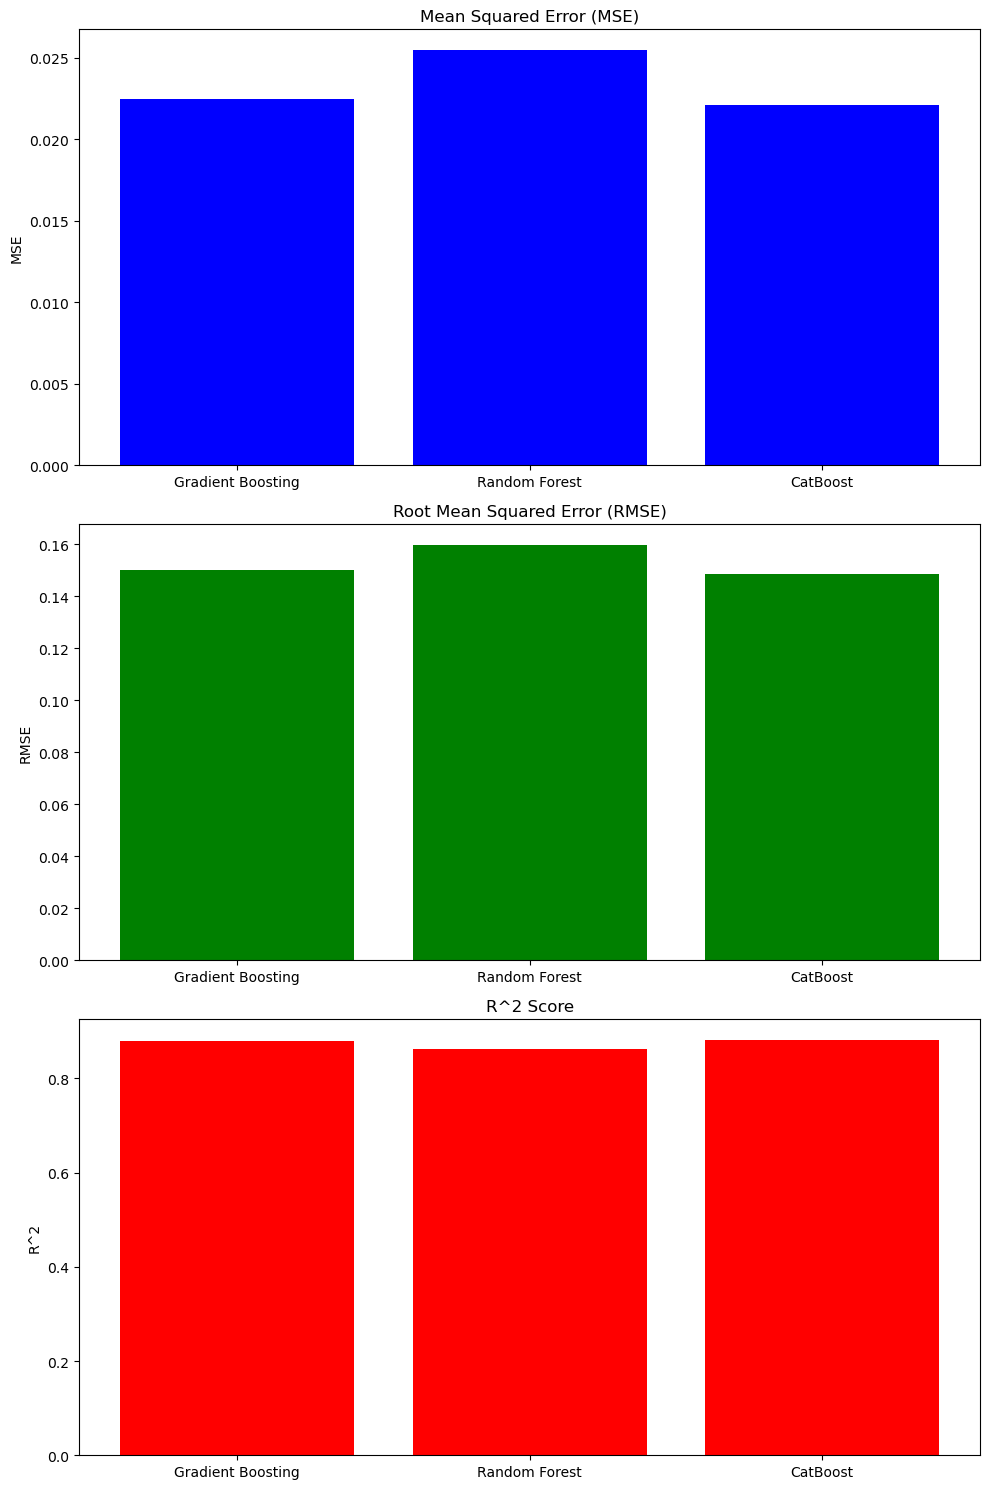

In [129]:
# Performance and Error Visualisation
models = ['Gradient Boosting', 'Random Forest', 'CatBoost']
mse_values = [gbr_mse, rf_mse, catboost_mse]
rmse_values = [gbr_rmse, rf_rmse, catboost_rmse]
r2_values = [gbr_r2, rf_r2, catboost_r2]

# Plotting the results
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# MSE
ax[0].bar(models, mse_values, color='blue')
ax[0].set_title('Mean Squared Error (MSE)')
ax[0].set_ylabel('MSE')

# RMSE
ax[1].bar(models, rmse_values, color='green')
ax[1].set_title('Root Mean Squared Error (RMSE)')
ax[1].set_ylabel('RMSE')

# R^2 Score
ax[2].bar(models, r2_values, color='red')
ax[2].set_title('R^2 Score')
ax[2].set_ylabel('R^2')

plt.tight_layout()
plt.show()

In [130]:
# Load and Inspect the Dataset



# Check Memory Usage




## Testing 

In [131]:
# Importing a CSV File with Features and Predicting it's SalePrice using one of the models

test_data = pd.read_csv("data/test.csv")

# List of significant categorical features
significant_features = ['MSZoning', 'Street', 'LotShape', 'LotConfig', 'Neighborhood', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'Heating', 'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'SaleType', 'SaleCondition']

# List of selected numerical columns
selected_columns_numerical = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
                              'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']


required_columns = ['Id'] + significant_features + selected_columns_numerical
test_data = test_data[required_columns]

In [132]:
# Handling the Missing Values in Test Data
imputer = SimpleImputer(strategy='most_frequent')
test_data_imputed = pd.DataFrame(imputer.fit_transform(test_data), columns=test_data.columns)


In [133]:
# One-Hot Encoding the significant categorical features in the test data
test_data_encoded = pd.get_dummies(test_data_imputed, columns=significant_features)

# Convert boolean values to integers (0 and 1)
test_data_encoded = test_data_encoded.astype(int)

# Align the test data with the training data to ensure it has the same columns
test_data_encoded = test_data_encoded.reindex(columns=X_train.columns, fill_value=0)


In [134]:
# Predict SalePrice using the Gradient Boosting
new_predictions_rf = catboost_model.predict(test_data_encoded)

# Save predictions to the test_data DataFrame with the column name SalePrice
test_data['SalePrice'] = new_predictions_rf


In [135]:
test_data

Id MSZoning Street LotShape LotConfig Neighborhood MasVnrType  \
0     1461       RH   Pave      Reg    Inside        NAmes        NaN   
1     1462       RL   Pave      IR1    Corner        NAmes    BrkFace   
2     1463       RL   Pave      IR1    Inside      Gilbert        NaN   
3     1464       RL   Pave      IR1    Inside      Gilbert    BrkFace   
4     1465       RL   Pave      IR1    Inside      StoneBr        NaN   
...    ...      ...    ...      ...       ...          ...        ...   
1454  2915       RM   Pave      Reg    Inside      MeadowV        NaN   
1455  2916       RM   Pave      Reg    Inside      MeadowV        NaN   
1456  2917       RL   Pave      Reg    Inside      Mitchel        NaN   
1457  2918       RL   Pave      Reg    Inside      Mitchel        NaN   
1458  2919       RL   Pave      Reg    Inside      Mitchel    BrkFace   

     ExterQual ExterCond Foundation  ... YearBuilt YearRemodAdd TotalBsmtSF  \
0           TA        TA     CBlock  ...      1961         1961       882.0   
1           TA        TA     CBlock  ...      1958         1958      1329.0   
2           TA        TA      PConc  ...      1997         1998       928.0   
3           TA        TA      PConc  ...      1998         1998       926.0   
4           Gd        TA      PConc  ...      1992         1992      1280.0   
...        ...       ...        ...  ...       ...          ...         ...   
1454        TA        TA     CBlock  ...      1970         1970       546.0   
1455        TA        TA     CBlock  ...      1970         1970       546.0   
1456        TA        TA     CBlock  ...      1960         1996      1224.0   
1457        TA        TA      PConc  ...      1992         1992       912.0   
1458        TA        TA      PConc  ...      1993         1994       996.0   

     1stFlrSF GrLivArea FullBath TotRmsAbvGrd GarageCars GarageArea  \
0         896       896        1            5        1.0      730.0   
1        1329      1329        1            6        1.0      312.0   
2         928      1629        2            6        2.0      482.0   
3         926      1604        2            7        2.0      470.0   
4        1280      1280        2            5        2.0      506.0   
...       ...       ...      ...          ...        ...        ...   
1454      546      1092        1            5        0.0        0.0   
1455      546      1092        1            6        1.0      286.0   
1456     1224      1224        1            7        2.0      576.0   
1457      970       970        1            6        0.0        0.0   
1458      996      2000        2            9        3.0      650.0   

          SalePrice  
0     121321.487558  
1     152187.877226  
2     171942.920241  
3     189002.112114  
4     199263.917422  
...             ...  
1454   80057.435461  
1455   87814.036158  
1456  145390.121940  
1457  118104.442541  
1458  215735.362332  

[1459 rows x 31 columns]

In [136]:
# Display ID and SalePrice columns from test_data DataFrame
test_data[['Id', 'SalePrice']]

Id      SalePrice
0     1461  121321.487558
1     1462  152187.877226
2     1463  171942.920241
3     1464  189002.112114
4     1465  199263.917422
...    ...            ...
1454  2915   80057.435461
1455  2916   87814.036158
1456  2917  145390.121940
1457  2918  118104.442541
1458  2919  215735.362332

[1459 rows x 2 columns]

In [137]:
# Save the Id and SalePrice columns to a new CSV file
test_data[['Id', 'SalePrice']].to_csv('predicted_sale_prices.csv', index=False)